# <font color="green"> Analyse et optimisation des intéractions usagers à la Mairie de Paris</font>

##  Contexte du Projet

Ce projet est dédié à l'analyse approfondie des interactions usagers à la Mairie de Paris pour le mois de juin 2023. Dans ce contexte, j'ai examiné de près les données extraites des fichiers Appel_202306.csv et Times_202306.csv. Ces données fournissent un aperçu détaillé des appels reçus par les différentes mairies d'arrondissement de la Ville, mettant en lumière des aspects cruciaux tels que les temps d'attente, les choix thématiques des usagers et les résolutions d'appels.

Ce travail a été conçu pour fournir des insights clairs et précis, formant ainsi la base de mes recommandations pour améliorer la qualité du service client à la Mairie de Paris.

# <font color="green">Analyses exploratoires et descriptives des données</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Importation des fichiers

In [2]:
appels = pd.read_csv("1.Appels_202306.csv", delimiter=';')
times = pd.read_csv("1.Times_202306.csv", delimiter=';')


### Fonctions

In [3]:
# Définir la fonction d'analyses exploratoires
def analyses_exploratoires(dataset):
    """Effectue diverses analyses exploratoires sur le dataset donné."""
    apercu_table = dataset.sample(5)
    info_fichier = dataset.info()
    valeurs_uniques = dataset.nunique()
    doublons = dataset.duplicated().sum()
    valeurs_manquantes = dataset.isna().sum()
    description_statistique = dataset.describe(include='all')
    
    # Afficher les résultats avec display()
    display(info_fichier)
    display(apercu_table)
    display(valeurs_uniques)
    display(doublons)
    display(valeurs_manquantes)
    display(description_statistique)



In [4]:
# Définir une fonction pour obtenir les valeurs uniques d'une colonne spécifique
def obtenir_valeurs_uniques(dataset, colonne):
    """Retourne les valeurs uniques de la colonne spécifiée du dataset."""
    valeurs_uniques = dataset[colonne].unique()
    return valeurs_uniques

In [5]:
# Définir une fonction pour identifier les clés primaires des tables
def check_key(dataset):
    """ fait passer toutes les colonnes du dataframme pour voir quelles sont les colonnes qui respectent les 2 conditions:
    non null et unique """

    unique_cols = []  # Création d'une liste vide pour contenir les colonnes
    for col in dataset.columns : # passe sur toutes les colonne du dataframe
        if dataset[col].is_unique  and dataset[col].isna().sum() ==0: # renvoie True si il n'y a que des valeurs uniques + pas de valeurs manquants (dont Nan est 0)
            unique_cols.append(col)   # ajoute le nom de la colonne à la liste
    return unique_cols           # renvoie la liste

### <font color='blue'>Fichier Appels</font>


In [6]:
# Utilisation de la fonction d'analyses exploratoires
analyses_exploratoires(appels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56755 entries, 0 to 56754
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56755 non-null  int64 
 1   date_appel        56755 non-null  object
 2   canal             56755 non-null  object
 3   issue_appel       56755 non-null  object
 4   choix_thematique  56755 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


None

,id,date_appel,canal,issue_appel,choix_thematique
18093,2002620,2023-06-05 16:21:30,MA12,Message vocal,DemarcheEnMairie - Délai
44731,2160133,2023-06-26 14:53:57,MA08,Reponse Teleconseiller,Stationnement - Suivi de dossier
10008,2079785,2023-06-15 13:27:09,MA18,Abandon usager,Autres demandes - Autre
5901,2012408,2023-06-06 16:37:18,MA05,Reponse Teleconseiller,Action sociale - Autre demande
15976,2071699,2023-06-14 14:26:15,MA15,Reponse Teleconseiller,Stationnement - Suivi de dossier


id                  56755
date_appel          54146
canal                  20
issue_appel             5
choix_thematique       43
dtype: int64

0

id                  0
date_appel          0
canal               0
issue_appel         0
choix_thematique    0
dtype: int64

,id,date_appel,canal,issue_appel,choix_thematique
count,5.675500e+04,56755,56755,56755,56755
unique,NaN,54146,20,5,43
top,NaN,2023-06-01 16:21:04,MA14,Reponse Teleconseiller,Autres demandes - Autre
freq,NaN,4,5774,40417,15416
mean,2.078415e+06,NaN,NaN,NaN,NaN
std,6.383077e+04,NaN,NaN,NaN,NaN
min,1.971654e+06,NaN,NaN,NaN,NaN
25%,2.021413e+06,NaN,NaN,NaN,NaN
50%,2.076659e+06,NaN,NaN,NaN,NaN
75%,2.132252e+06,NaN,NaN,NaN,NaN


In [7]:
# Utilisation de la fonction pour obtenir les valeurs uniques de différentes colonnes
valeurs_uniques_canal = obtenir_valeurs_uniques(appels, 'canal')
valeurs_uniques_issue_appel = obtenir_valeurs_uniques(appels, 'issue_appel')
valeurs_uniques_choix_thematique = obtenir_valeurs_uniques(appels, 'choix_thematique')

# Affichage des valeurs uniques avec des sauts de ligne pour espacer les résultats
print("Valeurs uniques de la colonne 'canal':\n", valeurs_uniques_canal)
print("\nValeurs uniques de la colonne 'issue_appel':\n", valeurs_uniques_issue_appel)
print("\nValeurs uniques de la colonne 'choix_thematique':\n", valeurs_uniques_choix_thematique)


Valeurs uniques de la colonne 'canal':
 ['MAPC' 'MA15' 'MA19' 'MA09' 'MA20' 'MA18' 'MA12' 'MA11' 'MA17' 'MA14'
 'MA16' 'MA05' 'MA13' 'MA01' 'MA03' 'MA08' 'MA10' 'MA06' 'MA04' 'MA02']

Valeurs uniques de la colonne 'issue_appel':
 ['Message vocal' 'sms' 'Reponse Teleconseiller' 'Abandon usager'
 'Transfert automatique']

Valeurs uniques de la colonne 'choix_thematique':
 ['CNI Passeport - Suivi ANTS' 'Proprete - DMR'
 'DemarcheEnMairie - Autre demarche' 'Logement - Prise de RDV'
 'Autres demandes - Autre' 'Action sociale - Autre demande'
 'Logement - Information' 'Urbanisme - Autre demande'
 'CNI passeport - Prise de RDV' 'Police Municipale - Fourrieres'
 'CNI passeport - Autre demande' 'DemarcheEnMairie - Délai '
 'Stationnement - Fourrieres' 'Facil Familles - autre demande'
 "DemarcheEnMairie - Demande d'acte" 'CNI passeport - Annulation RDV'
 'CNI passeport - Information' 'Encombrants - Prise de RDV'
 'Police Municipale - Autre incivilité' 'Logement - Autre demande'
 'Action sociale 

### <font color='blue'>Fichier times</font>


In [8]:
# Utiliser la fonction d'analyses exploratoires
analyses_exploratoires(times)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48070 entries, 0 to 48069
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  48070 non-null  int64
 1   temps_attente       48070 non-null  int64
 2   Temps_conversation  48070 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


None

,id,temps_attente,Temps_conversation
21707,2051040,334,99
27102,2125143,280,52
21238,2177965,535,247
10625,2005286,608,235
3948,2141356,18,37


id                    48070
temps_attente           983
Temps_conversation     1067
dtype: int64

0

id                    0
temps_attente         0
Temps_conversation    0
dtype: int64

,id,temps_attente,Temps_conversation
count,4.807000e+04,48070.000000,48070.000000
mean,2.078590e+06,165.880944,150.562659
std,6.374043e+04,172.235180,163.009734
min,1.971654e+06,0.000000,0.000000
25%,2.021595e+06,22.000000,52.000000
50%,2.076899e+06,114.000000,108.000000
75%,2.132329e+06,256.000000,201.000000
max,2.189679e+06,2180.000000,3662.000000


<div style="background-color:steelblue; padding:10px">
<span style="color:white">Ici on peut déjà faire une première analyse. On constate que la plupart des conversations durent moins de 201 secondes (environ 3 minutes) puisque le troisième quartile est à 201 secondes. La médiane (108 secondes) est beaucoup plus basse que la moyenne (150.56 secondes), ce qui suggère que quelques conversations très longues (outliers) font augmenter la moyenne. 

Et c'est le même constat pour le temps d'attente</span>
    
</div>

In [9]:
# Création d'une nouvelle colonne en minutes en divisant la colonne en secondes par 60 pour que ça soit plus parlant

times ['Temps_conversation_minutes'] = times ['Temps_conversation'] / 60
times ['Temps_attente_minutes'] = times ['temps_attente'] / 60
times

,id,temps_attente,Temps_conversation,Temps_conversation_minutes,Temps_attente_minutes
0,2078793,329,272,4.533333,5.483333
1,2078790,318,200,3.333333,5.300000
2,2078784,348,68,1.133333,5.800000
3,2078782,114,609,10.150000,1.900000
4,2078778,317,0,0.000000,5.283333
...,...,...,...,...,...
48065,2131911,7,471,7.850000,0.116667
48066,2131909,7,151,2.516667,0.116667
48067,2131906,3,189,3.150000,0.050000
48068,2131904,24,0,0.000000,0.400000


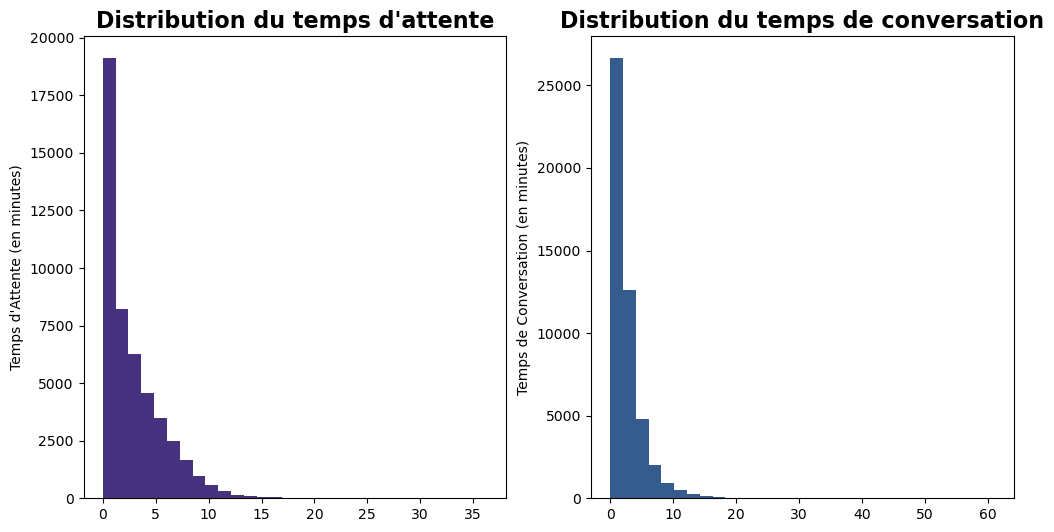

In [10]:
# Création de visuel pour confirmer le premier constat
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
palette = 'viridis'

# Distribution du Temps_attente_minutes
axes[0].hist(times['Temps_attente_minutes'], bins=30, color=sns.color_palette(palette)[0])
axes[0].set_title('Distribution du temps d\'attente', fontweight='bold', fontsize=16)
axes[0].set_ylabel('Temps d\'Attente (en minutes)')

# Distribution du Temps_conversation_minutes
axes[1].hist(times['Temps_conversation_minutes'], bins=30, color=sns.color_palette(palette)[1])
axes[1].set_title('Distribution du temps de conversation', fontweight='bold', fontsize=16)
axes[1].set_ylabel('Temps de Conversation (en minutes)');

plt.savefig('distribution_temps.png', dpi=300, bbox_inches='tight')

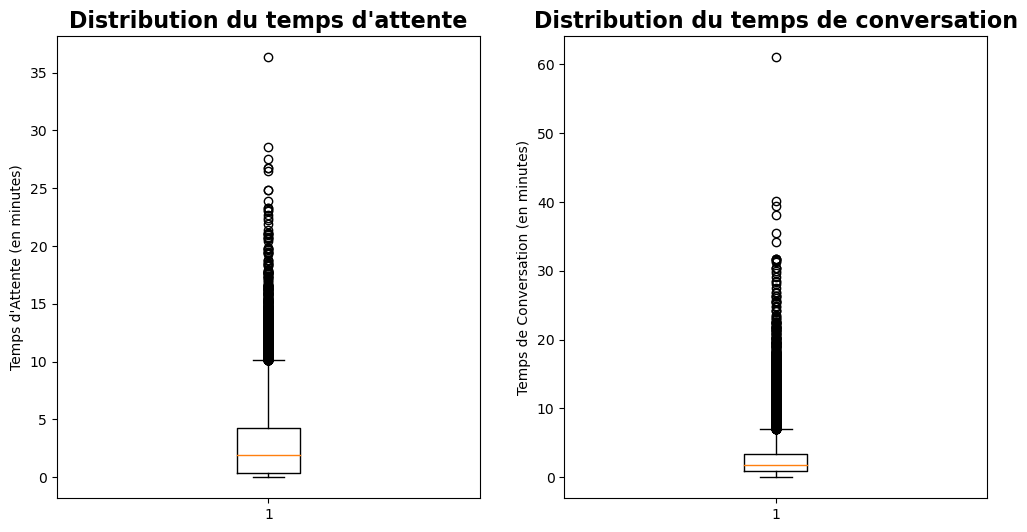

In [11]:
# Création de visuels pour regarder les valeurs aberrantes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Diagramme en boîte pour Temps_attente_minutes
axes[0].boxplot(times['Temps_attente_minutes'])
axes[0].set_title('Distribution du temps d\'attente', fontweight='bold', fontsize=16)
axes[0].set_ylabel('Temps d\'Attente (en minutes)')

# Diagramme en boîte pour Temps_conversation_minutes
axes[1].boxplot(times['Temps_conversation_minutes'])
axes[1].set_title('Distribution du temps de conversation', fontweight='bold', fontsize=16)
axes[1].set_ylabel('Temps de Conversation (en minutes)');

plt.savefig('outliers_temps.png', dpi=300, bbox_inches='tight')

### Jointures des deux tables 

In [12]:
# vérification de la clé primaire pour les 2 fichiers
check_key(appels)
check_key(times)

['id']

In [13]:
# Jointure
Jointure=pd.merge(appels, times, on=["id"], how="outer", indicator=True)
Jointure.sample(3)

,id,date_appel,canal,issue_appel,choix_thematique,temps_attente,Temps_conversation,Temps_conversation_minutes,Temps_attente_minutes,_merge
13973,2036004,2023-06-09 12:13:50,MA15,Reponse Teleconseiller,DemarcheEnMairie - Demande d'acte,288.0,108.0,1.8,4.800000,both
41504,2110315,2023-06-20 09:41:09,MA14,Reponse Teleconseiller,Autres demandes - Autre,238.0,306.0,5.1,3.966667,both
26055,2052547,2023-06-12 14:22:57,MA09,Abandon usager,Action sociale - Autre demande,13.0,0.0,0.0,0.216667,both


In [14]:
# Analyse de la colonne merge
Jointure["_merge"].value_counts()

_merge
both          48070
left_only      8685
right_only        0
Name: count, dtype: int64

<div style="background-color:steelblue; padding:10px">
<span style="color:white">On constate que 8685 id dans la table "appels" n'ont pas de correspondance avec la table "times"</span>
    
</div>

In [15]:
# Zoom sur les id sans temps de conversations ni d'attentes
Jointure.loc[Jointure["_merge"] =="left_only"]

,id,date_appel,canal,issue_appel,choix_thematique,temps_attente,Temps_conversation,Temps_conversation_minutes,Temps_attente_minutes,_merge
0,1998532,2023-06-05 11:59:55,MAPC,Message vocal,CNI Passeport - Suivi ANTS,NaN,NaN,NaN,NaN,left_only
1,1998529,2023-06-05 11:59:47,MA15,sms,Proprete - DMR,NaN,NaN,NaN,NaN,left_only
3,1998523,2023-06-05 11:59:24,MA09,sms,Logement - Prise de RDV,NaN,NaN,NaN,NaN,left_only
9,1998503,2023-06-05 11:58:28,MA14,Message vocal,CNI Passeport - Suivi ANTS,NaN,NaN,NaN,NaN,left_only
11,1998491,2023-06-05 11:57:47,MA17,Message vocal,CNI Passeport - Suivi ANTS,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
56719,2119025,2023-06-21 08:42:35,MA01,Message vocal,CNI Passeport - Suivi ANTS,NaN,NaN,NaN,NaN,left_only
56721,2119021,2023-06-21 08:42:23,MA14,Message vocal,DemarcheEnMairie - Délai,NaN,NaN,NaN,NaN,left_only
56734,2118990,2023-06-21 08:38:45,MA16,sms,Encombrants - Prise de RDV,NaN,NaN,NaN,NaN,left_only
56743,2118961,2023-06-21 08:35:31,MA11,Message vocal,CNI Passeport - Suivi ANTS,NaN,NaN,NaN,NaN,left_only


<div style="background-color:steelblue; padding:10px">
<span style="color:white"> On constate qu'il s'agit des messages vocaux et des sms dans la colonne "issue_appel" donc c'est normal.</span>
    
</div>

### Quelques transformations utiles pour les visuels

In [16]:
# Conversion de la colonne date_appel en format datetime
Jointure['date_appel'] = pd.to_datetime(Jointure['date_appel'], format='%Y-%m-%d %H:%M:%S')

# Extraction de la date (sans l'heure) pour l'analyse quotidienne
Jointure['date'] = Jointure['date_appel'].dt.date

# Extraction de l'heure de l'appel
Jointure['heure'] = Jointure['date_appel'].dt.hour


# <font color="green">Visualisation des données</font>

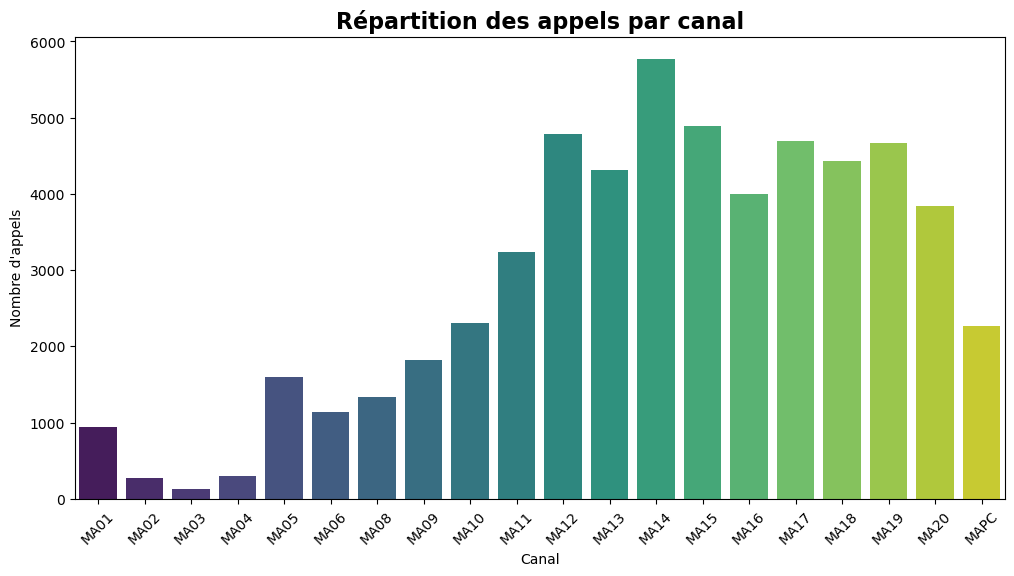

In [17]:
# Diagramme en comptage pour la répartition des appels par canal
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x='canal', data=Jointure, ax=ax, order=sorted(Jointure['canal'].unique()), palette=palette) #trié par ordre alphabétique
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Canal')
ax.set_ylabel("Nombre d'appels")
ax.set_title('Répartition des appels par canal', fontweight='bold', fontsize=16);

plt.savefig('répartition_appels.png', dpi=300, bbox_inches='tight')

Dans le mois, il y a une disparité d'appels selon les mairies d'arrondissement. Par exemple au mois de juin, la Mairie du 14ème a enrigistré un peu moins de 6000 appels, tandis que la Mairie du 3ème n'a reçu que 200-250 appels.

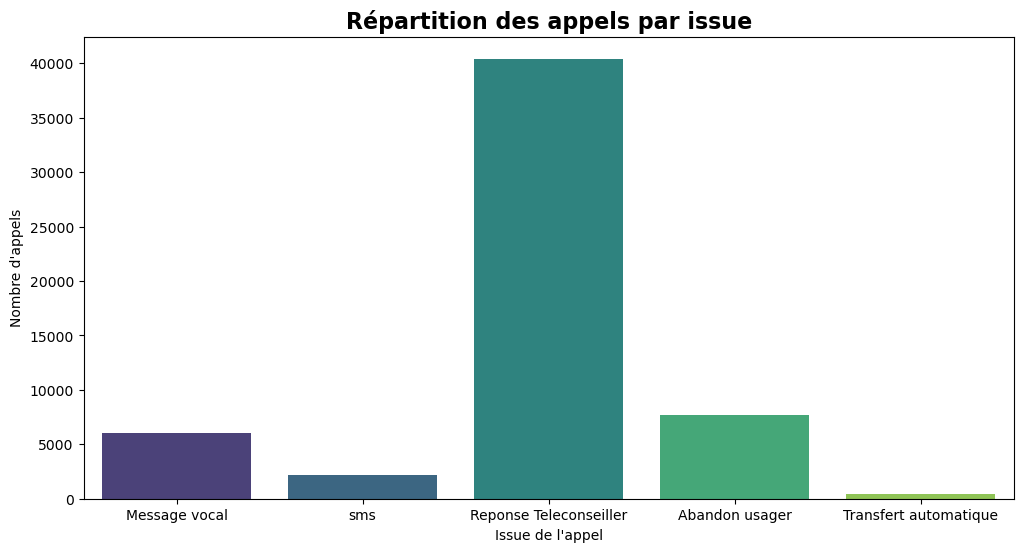

In [18]:
# Répartition selon la façon dont s'est soldée l'appel
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x='issue_appel', data=Jointure, ax=ax, palette=palette)
ax.set_xlabel('Issue de l\'appel')
ax.set_ylabel("Nombre d'appels")
ax.set_title('Répartition des appels par issue', fontweight='bold', fontsize=16);

plt.savefig('répartitions_appels_par_issues.png', dpi=300, bbox_inches='tight')

1/4 des usagers abandonnent, ce qui est considérable.

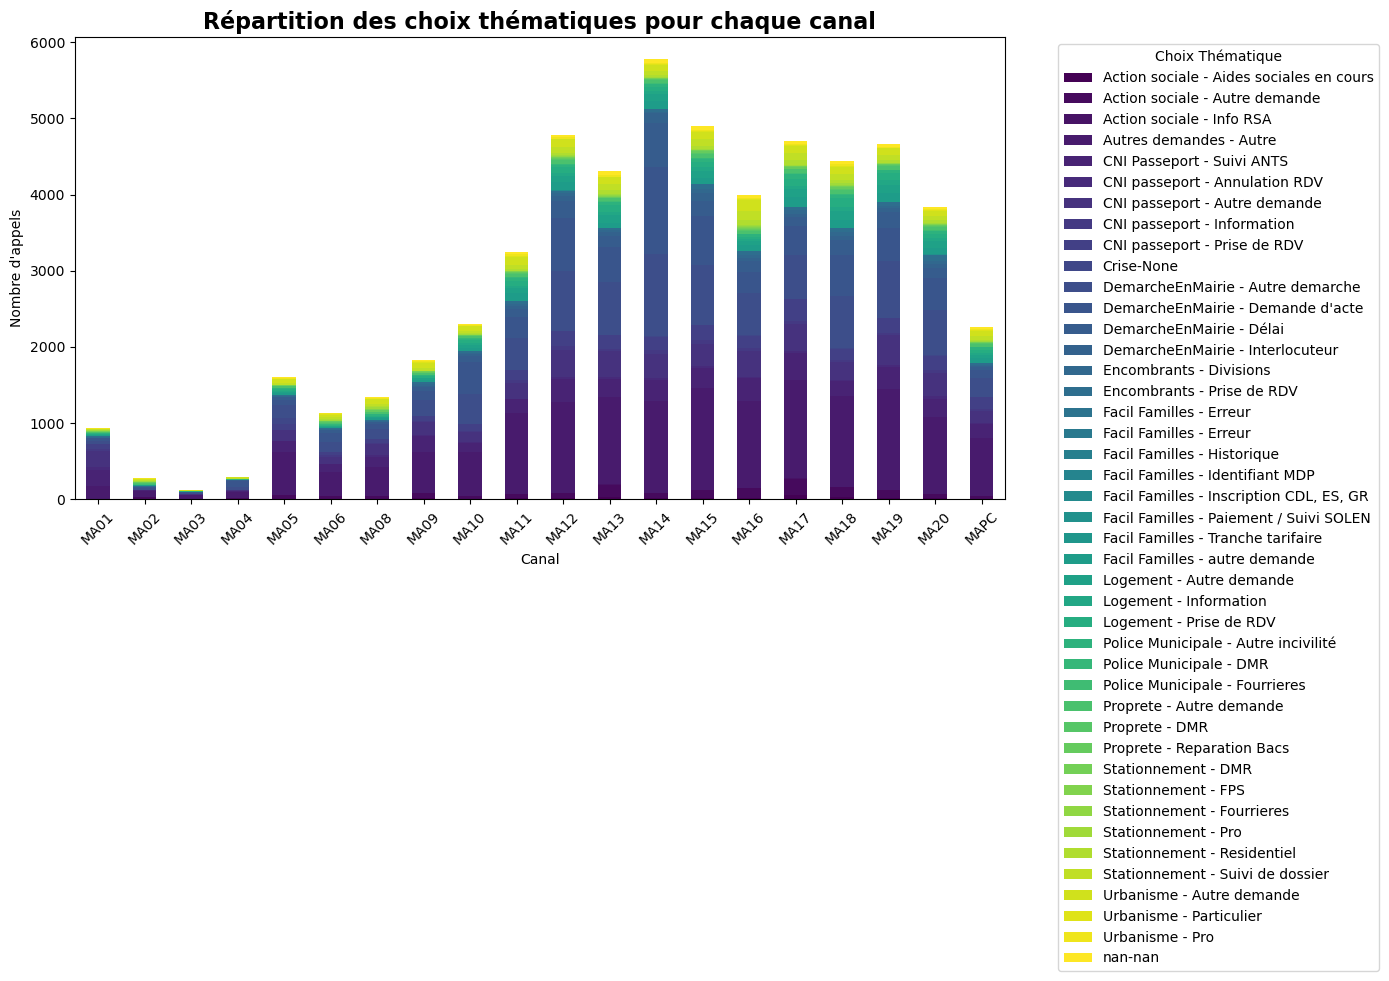

In [19]:
# Fréquence des choix thématiques pour chaque canal

# Création d'une table pivot pour préparer les données pour le graphique 
pivot_table = Jointure.pivot_table(index='canal', columns='choix_thematique', values='id', aggfunc='count', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Canal')
plt.ylabel('Nombre d\'appels')
plt.title('Répartition des choix thématiques pour chaque canal', fontweight='bold', fontsize=16)
plt.legend(title='Choix Thématique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45);

plt.savefig('repartition_theme_canal.png', dpi=300, bbox_inches='tight')

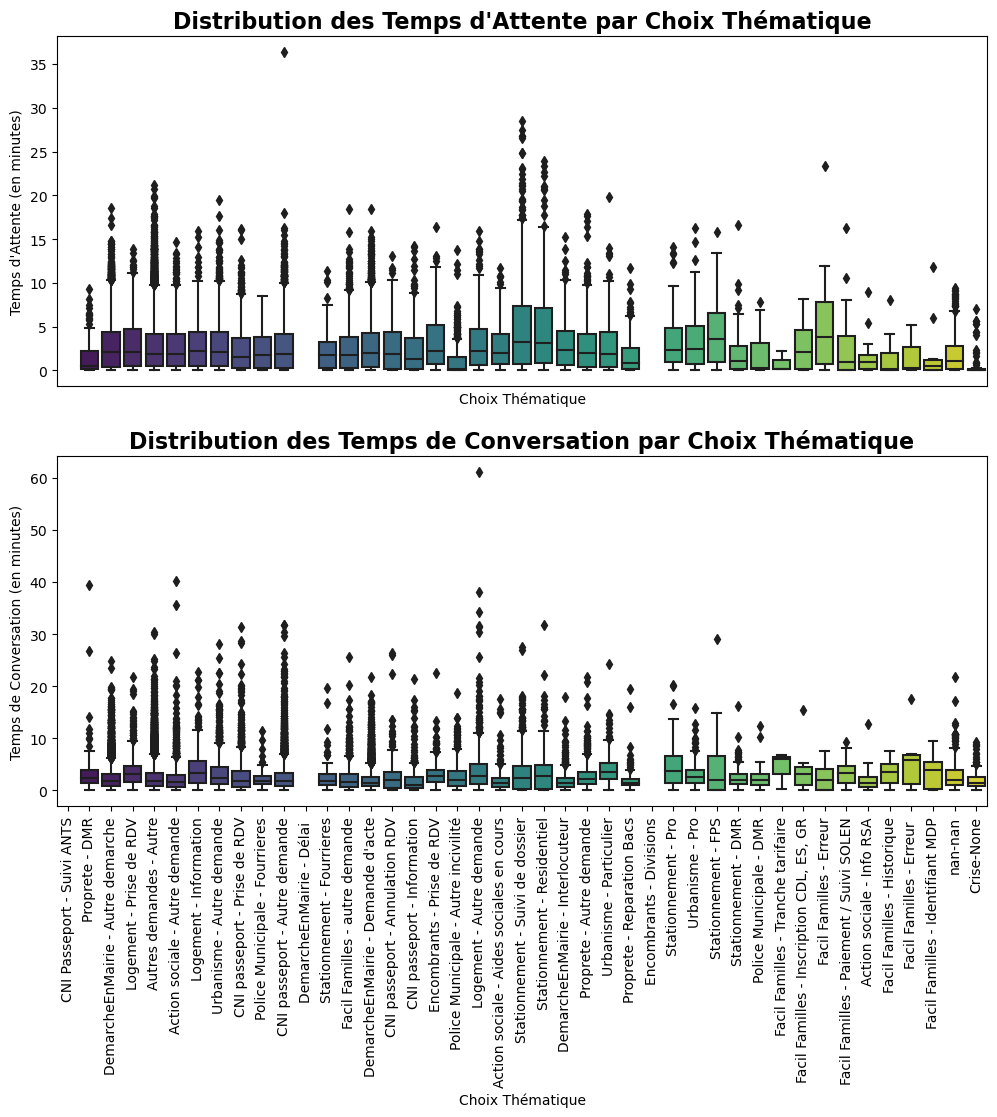

In [20]:
# Correlation entre le temps d'attente ou de conversation et les choix thématiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Graphique pour le temps d'attente
sns.boxplot(x='choix_thematique', y='Temps_attente_minutes', data=Jointure, ax=axes[0], palette=palette)
axes[0].set_xticks([]) # désactiver l'axe des x
axes[0].set_xlabel('Choix Thématique')
axes[0].set_ylabel('Temps d\'Attente (en minutes)')
axes[0].set_title('Distribution des Temps d\'Attente par Choix Thématique', fontweight='bold', fontsize=16)

# Graphique pour le temps de conversation
sns.boxplot(x='choix_thematique', y='Temps_conversation_minutes', data=Jointure, ax=axes[1], palette=palette)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Choix Thématique')
axes[1].set_ylabel('Temps de Conversation (en minutes)')
axes[1].set_title('Distribution des Temps de Conversation par Choix Thématique', fontweight='bold', fontsize=16);

plt.savefig('Distribution_temps_par_choix.png', dpi=300, bbox_inches='tight')

# <font color="green"> Zoom sur 2 Mairies d'Arrondissement : 14 et 03 </font>

In [21]:
# Zoom sur les canaux MA03 et MA14
MA14 = Jointure[Jointure['canal'] == 'MA14']
MA03 = Jointure[Jointure['canal'] == 'MA03']

In [22]:
# Apercu du nombre d'appels par jour pour la mairie du 14eme
MA14_daily= MA14.groupby('date').size()
MA14_daily

date
2023-06-01    227
2023-06-02    291
2023-06-05    332
2023-06-06    248
2023-06-07    293
2023-06-08    237
2023-06-09    243
2023-06-12    300
2023-06-13    265
2023-06-14    257
2023-06-15    245
2023-06-16    282
2023-06-19    314
2023-06-20    275
2023-06-21    286
2023-06-22    258
2023-06-23    278
2023-06-26    330
2023-06-27    309
2023-06-28    259
2023-06-29    245
dtype: int64

In [23]:
# Apercu du nombre d'appels par jour pour la mairie du 3eme
MA03_daily= MA03.groupby('date').size()
MA03_daily

date
2023-06-01    7
2023-06-02    7
2023-06-05    8
2023-06-06    7
2023-06-07    8
2023-06-08    3
2023-06-09    3
2023-06-12    5
2023-06-13    5
2023-06-14    9
2023-06-15    4
2023-06-16    7
2023-06-19    6
2023-06-20    4
2023-06-21    8
2023-06-22    3
2023-06-23    2
2023-06-26    5
2023-06-27    5
2023-06-28    9
2023-06-29    6
dtype: int64

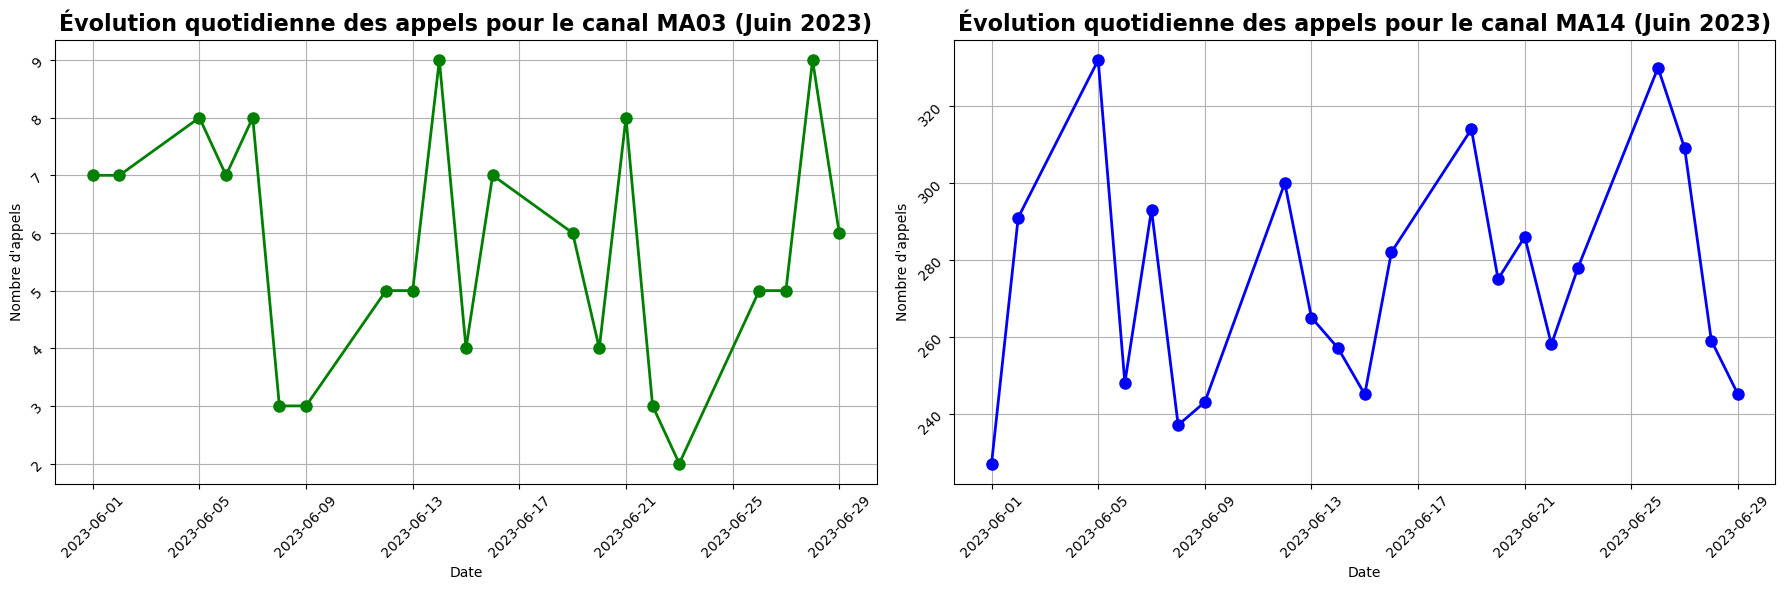

<Figure size 640x480 with 0 Axes>

In [24]:
# Evolution quotidienne des appels pour les 2 canaux
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Premier graphique pour le canal MA03
axes[0].plot(MA03_daily.index, MA03_daily.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
axes[0].set_xlabel('Date')
axes[0].set_ylabel("Nombre d'appels")
axes[0].set_title('Évolution quotidienne des appels pour le canal MA03 (Juin 2023)', fontweight='bold', fontsize=16)
axes[0].tick_params(rotation=45)
axes[0].grid(True)

# Deuxième graphique pour le canal MA14
axes[1].plot(MA14_daily.index, MA14_daily.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
axes[1].set_xlabel('Date')
axes[1].set_ylabel("Nombre d'appels")
axes[1].set_title('Évolution quotidienne des appels pour le canal MA14 (Juin 2023)', fontweight='bold', fontsize=16)
axes[1].tick_params(rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

plt.savefig('Evolution_appels.png', dpi=300, bbox_inches='tight')